In [11]:
"""
Magic commands
"""
%matplotlib inline
%load_ext autoreload
%autoreload 2

"""
Python standard packages
"""
import os
import sys
from IPython.display import display, clear_output

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as colors
from matplotlib import cm
import seaborn as sns
sns.set_theme("paper", "whitegrid")
"""
packages for dataload and simulation
"""
import ffn # data access
from arch import arch_model  # simulation
from arch.univariate import SkewStudent, GARCH, EGARCH, ARX
"""
Own packages
"""
sys.path.insert(0, "C:\\code\\speciale\\") # vesl path
sys.path.insert(0, "C:\\Users\\lucas\\OneDrive\\Skrivebord\\repo\\speciale\\") # ljb path

from stock_simulation_study.stock_environment import StockEnvironment, StockEnvironmentTwo
from stock_simulation_study.stock_agent import RLStockAgent
#==============
from stock_simulation_study.reinforce import REINFORCE_Agent
import time
#==============

import codelib  # used for extending pandas

from codelib.plotting import DefaultStyle, fan_chart
DefaultStyle()

"""
ignore warnings
"""
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
prices = ffn.get('aapl', start = '2010-01-01')

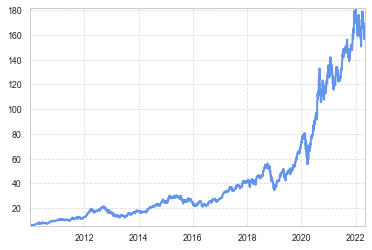

In [13]:
plt.plot(prices)

In [5]:
def position_plot(actions, price, title, savefig = "", ylab = ""):
    annotation = pd.DataFrame(actions.values, columns = {"pos"})
    to_join = pd.DataFrame({'col_map': ['red', 'orangered', 'yellow', 'lightgreen', 'green'],
                            'pos': [-2, -1, 0, 1, 2]})
    c = annotation.merge(to_join, on='pos', how='left')["col_map"]
    x = np.linspace(0, len(price), len(price)+1)
    lines = [((x0,y0), (x1,y1)) for x0, y0, x1, y1 in zip(x[:-1], price[:-1], x[1:], price[1:])]
    colored_lines = LineCollection(lines, colors=c, linewidths=(2,))

    fig, ax = plt.subplots(1,figsize=(8, 8))
    ax.add_collection(colored_lines)
    ax.autoscale_view()
    plt.title(title)
    plt.xlabel("timestep")
    plt.ylabel(ylab)
    if savefig != "":
        plt.savefig(savefig, bbox_inches='tight')
    plt.show()
    


def color_plot(color_vals, y_vals, title, savefig = ""):
#     x = np.linspace(0, 3 * np.pi, 500)
#     y = np.sin(x)
#     dydx = np.cos(0.5 * (x[:-1] + x[1:]))
    x = np.linspace(0, len(y_vals), len(y_vals))
    y = y_vals
    dydx = color_vals
    # Create a set of line segments so that we can color them individually
    # This creates the points as a N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be (numlines) x (points per line) x 2 (for x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    fig, axs = plt.subplots(1, figsize=(8, 8))

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(dydx.min(), dydx.max())
    cmap = cm.RdYlGn
    lc = LineCollection(segments, cmap=cmap, norm=colors.CenteredNorm())
    # Set the values used for colormapping
    lc.set_array(dydx)
    lc.set_linewidth(2)
    line = axs.add_collection(lc)
    fig.colorbar(line, ax=axs)

    #axs.set_xlim(x.min(), x.max())
    #axs.set_ylim(dydx.min(), dydx.max()+1)
    axs.autoscale_view()
    plt.title(title)
    plt.xlabel("timestep")
    plt.ylabel("price")
    if savefig != "":
        plt.savefig(savefig, bbox_inches='tight')
    plt.show()


In [27]:
n_time_points = int(250*2.5)
N_EPISODES = 100
nstocks = 1
lag = 1
env = StockEnvironmentTwo(prices = prices, n_time_points = n_time_points, 
                          price_type = "sim_prices", kappa = 0.00001,
                         trade_cost = 0.01)
global env

agent = REINFORCE_Agent(state_size=21,
                        action_size=5,
                        discount_rate=0.99,
                        epsilon = 0.1,
                        n_hidden_layers=4, 
                        hidden_layer_size=512,
                        learning_rate=0.000001,
                        mu_zero = False,
                        dropout = 0.1
                       )

Iteration:      1,   Func. Count:      9,   Neg. LLF: 152657.87967329874
Iteration:      2,   Func. Count:     21,   Neg. LLF: 71954.41178685498
Iteration:      3,   Func. Count:     32,   Neg. LLF: 102022.64725133142
Iteration:      4,   Func. Count:     42,   Neg. LLF: 129223.8042324509
Iteration:      5,   Func. Count:     52,   Neg. LLF: 127462.80939028371
Iteration:      6,   Func. Count:     62,   Neg. LLF: 8739.5849571874
Iteration:      7,   Func. Count:     71,   Neg. LLF: 5834.283590068773
Iteration:      8,   Func. Count:     80,   Neg. LLF: 7809.680509833488
Iteration:      9,   Func. Count:     89,   Neg. LLF: 5809.822898358348
Iteration:     10,   Func. Count:     98,   Neg. LLF: 5799.908845442447
Iteration:     11,   Func. Count:    107,   Neg. LLF: 5798.704194798369
Iteration:     12,   Func. Count:    116,   Neg. LLF: 5796.018186627891
Iteration:     13,   Func. Count:    124,   Neg. LLF: 5796.006135758349
Iteration:     14,   Func. Count:    132,   Neg. LLF: 5796.0052

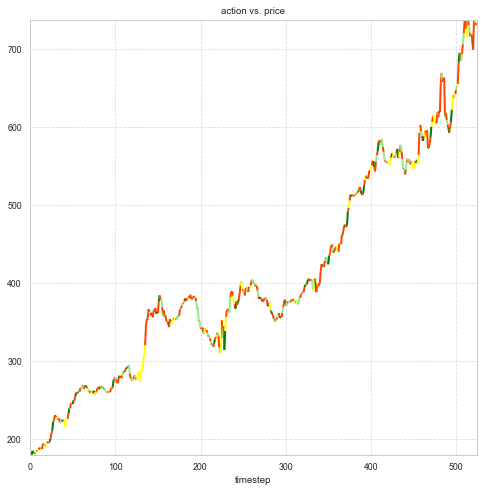

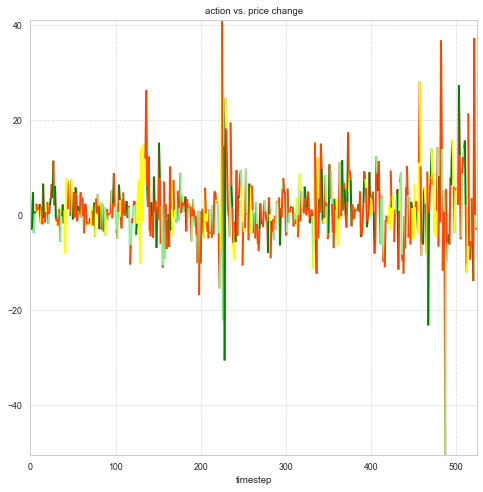

C:\Users\lucas\AppData\Local\Temp\ipykernel_38620\2813974115.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


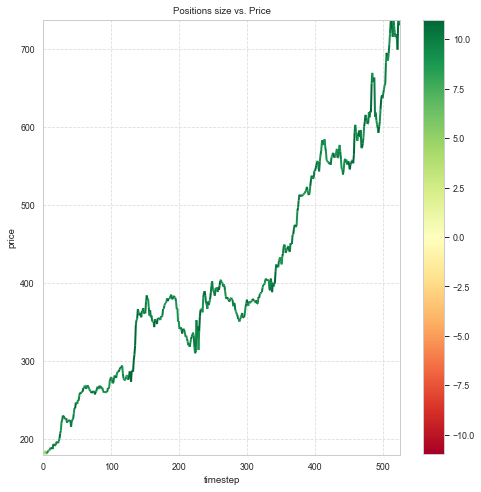

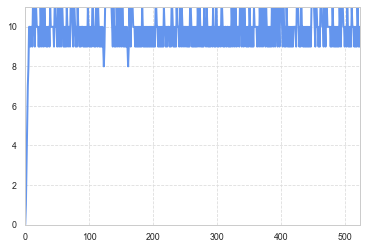

0    250
1     92
2    106
3     77
Name: 1, dtype: int64
ACT REW 5350.069842927288
REW:  5228.729253602762


In [ ]:
agent.epsilon = 0.8
N_EPISODES = 110000
start_time = time.time()
print("Start: %s" % (time.strftime("%H:%M:%S")))
final_results = pd.DataFrame({0: [1], 1: [1], 2: [1], 3: [1], 4: [1]})
action_episodes = pd.DataFrame()
prices_episodes = pd.DataFrame()
return_episodes = pd.DataFrame()
position_size_episodes = pd.DataFrame()
all_return_episodes = pd.DataFrame()
for e in range(N_EPISODES):
    agent.run_episode(env=env)
    agent.score_episode(e, N_EPISODES)
    
    if e % 100 == 0:
        
        clear_output()
        position_plot(actions = pd.DataFrame(agent.action_memory)- 2, price = np.array(agent.state_memory)[:,1],
             title = "action vs. price")
        position_plot(actions = pd.DataFrame(agent.action_memory)- 2, price = np.array(agent.state_memory)[:,11],
             title = "action vs. price change")
        color_plot(color_vals = np.array(agent.state_memory)[:,0], y_vals = np.array(agent.state_memory)[:,1],
             title = "Positions size vs. Price")
        plt.plot(np.array(agent.state_memory)[:,0])
        plt.show()
        unique, counts = np.unique(agent.action_memory, return_counts=True)
        results = pd.DataFrame(np.column_stack((unique, counts)).T)
        final_results = final_results.append(results.iloc[1])
        print(results.iloc[1])
        try:
            print("DIFF: ", np.sum(results.iloc[1] * np.array([-2,-1,0,1,2])) - pd.DataFrame(agent.state_memory).iloc[-1,0])
        except:
            pass
        print("ACT REW", np.sum(np.array(agent.state_memory)[:,0] * np.array(agent.state_memory)[:,-1]))
        print("REW: ", agent.results[-1])
#     if e and (e+1) % agent.save_interval == 0:
#         agent.save()

    all_return_episodes = pd.concat([all_return_episodes, pd.DataFrame(agent.state_memory).iloc[:,0] * 
                                     pd.DataFrame(agent.state_memory).iloc[:,11]], axis = 1)
    
    if any(np.array([50, 100, 250, 500, 1000, 2000, 5000, 9999])+1000-e == 0):
        action_episodes = pd.concat([action_episodes, pd.DataFrame(agent.action_memory)- 2], axis = 1)
        prices_episodes = pd.concat([prices_episodes, pd.DataFrame(agent.state_memory).iloc[:,1]], axis = 1)
        return_episodes = pd.concat([return_episodes, pd.DataFrame(agent.state_memory).iloc[:,11]], axis = 1)
        position_size_episodes = pd.concat([position_size_episodes, pd.DataFrame(agent.state_memory).iloc[:,0]], axis = 1)
    if e > 999:
        #agent.epsilon = np.maximum(np.exp(-e / 20), 0.01) 
        agent.epsilon = 0.01
elapsed_time = time.time() - start_time
print("\nTrain time: ", elapsed_time)

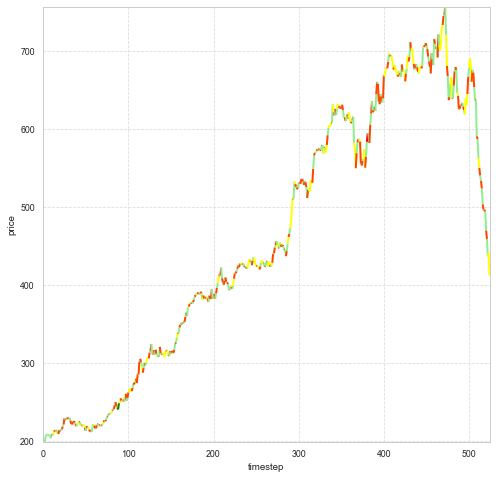

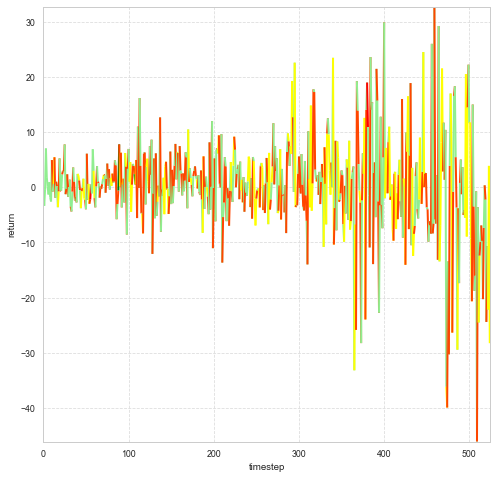

C:\Users\lucas\AppData\Local\Temp\ipykernel_38620\2813974115.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


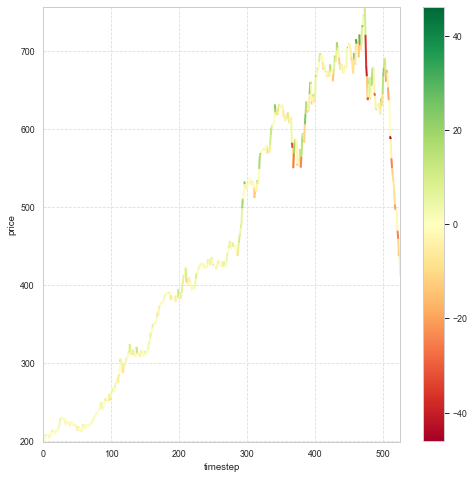

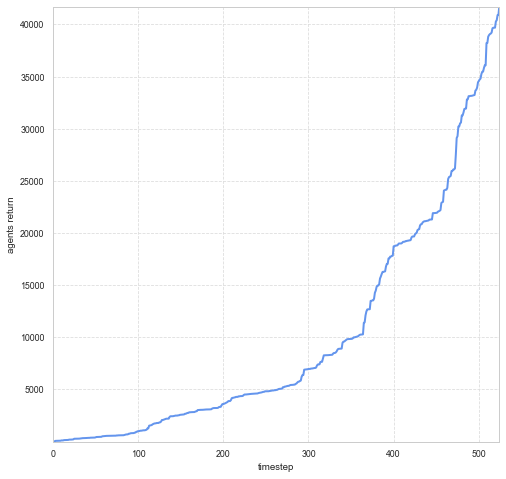

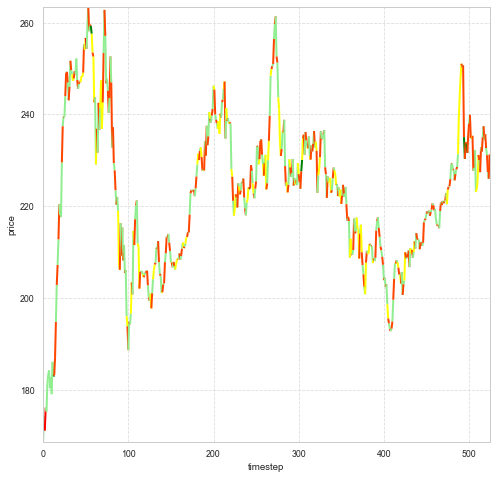

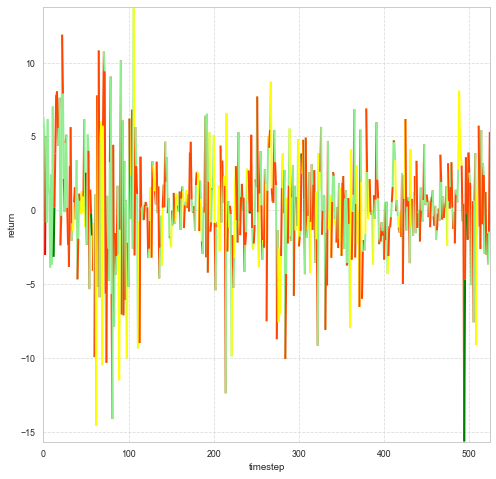

C:\Users\lucas\AppData\Local\Temp\ipykernel_38620\2813974115.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


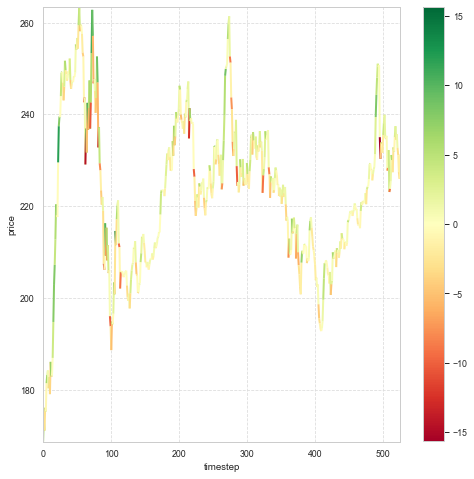

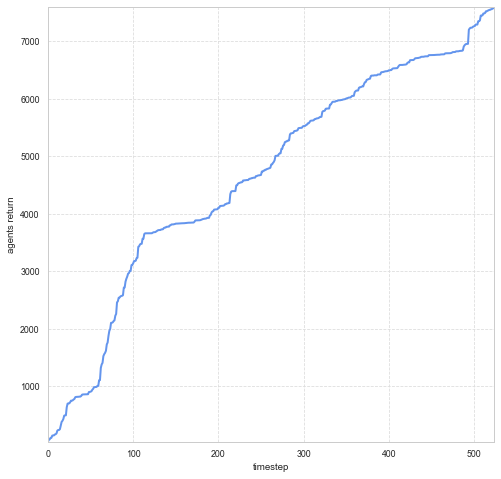

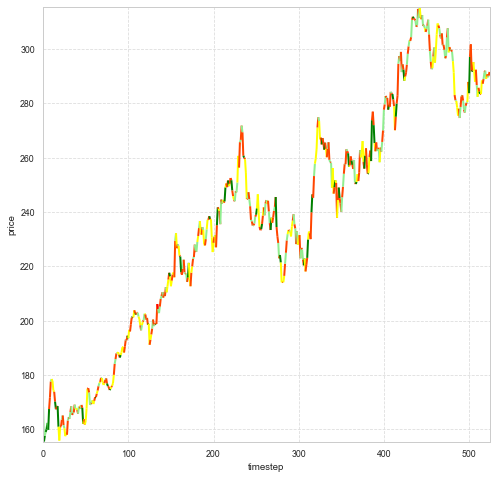

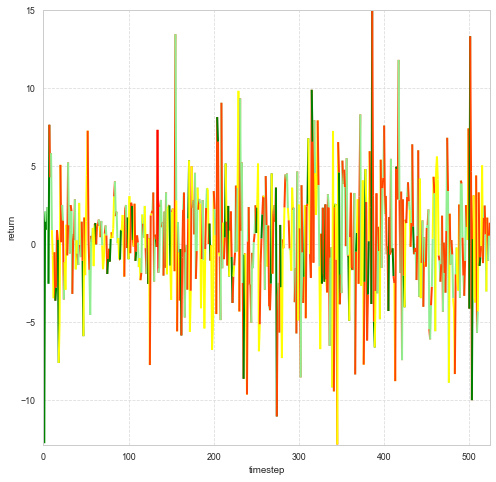

C:\Users\lucas\AppData\Local\Temp\ipykernel_38620\2813974115.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


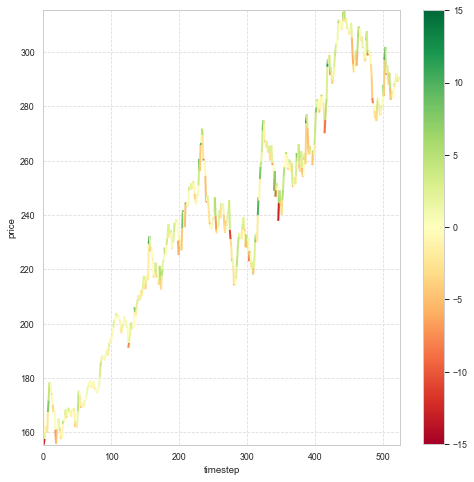

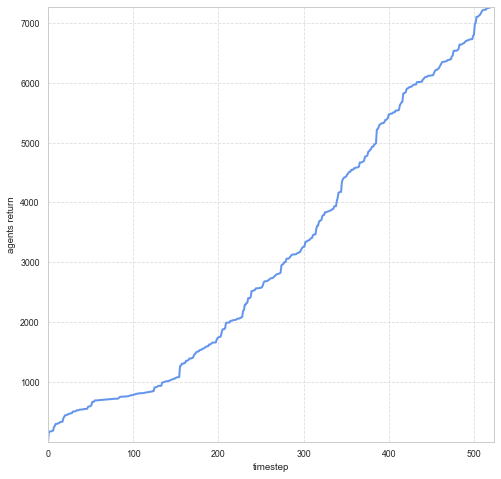

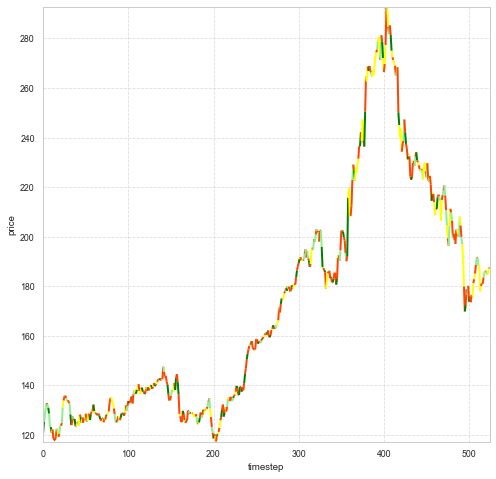

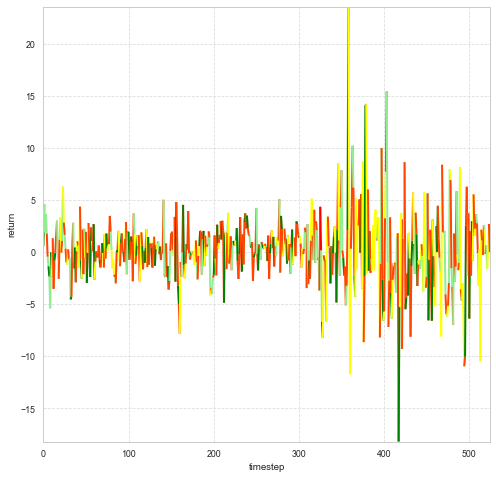

C:\Users\lucas\AppData\Local\Temp\ipykernel_38620\2813974115.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


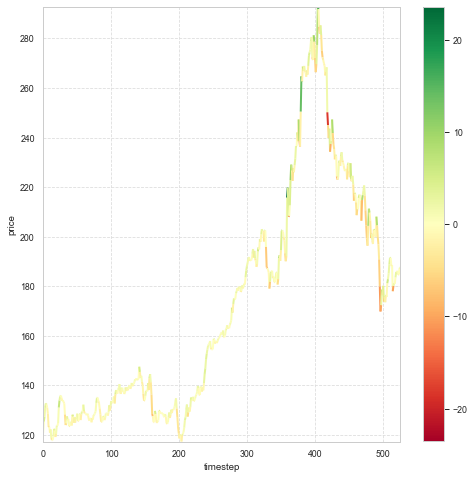

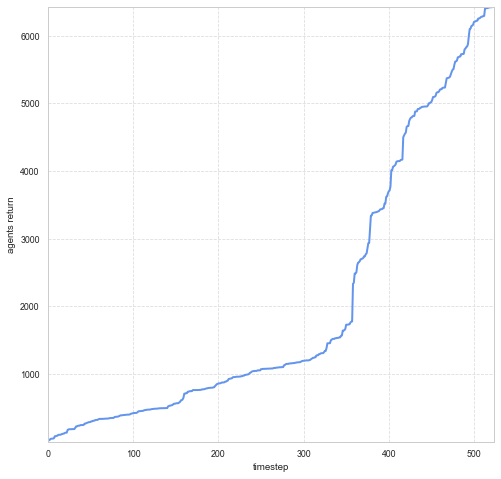

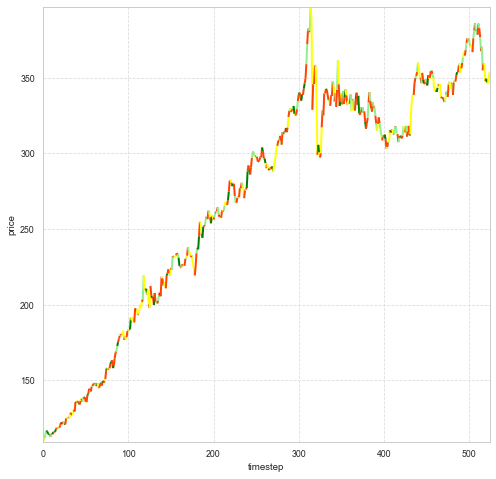

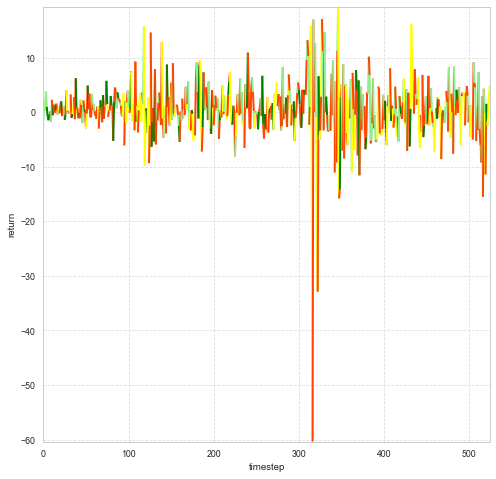

C:\Users\lucas\AppData\Local\Temp\ipykernel_38620\2813974115.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


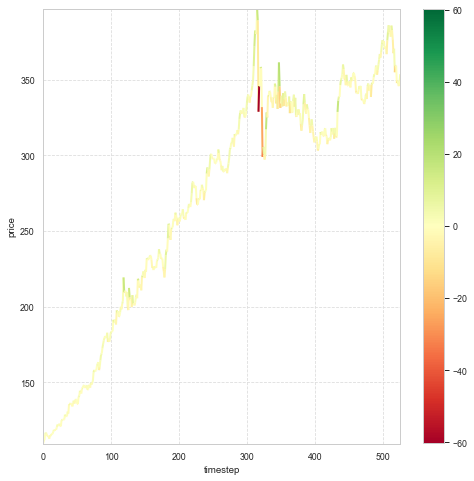

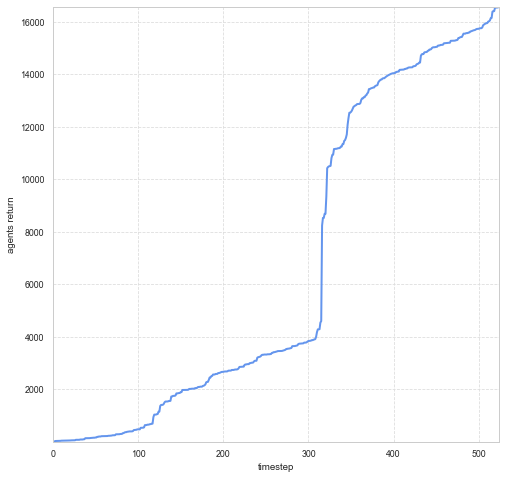

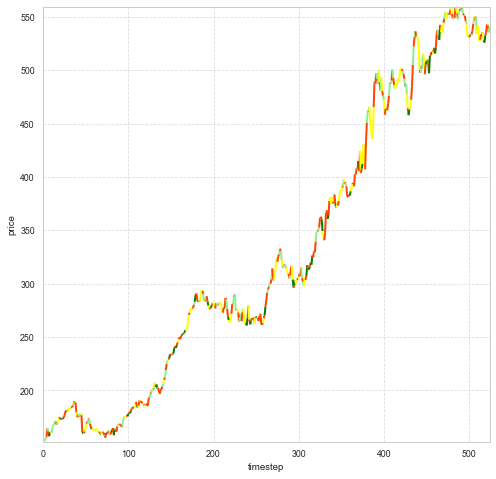

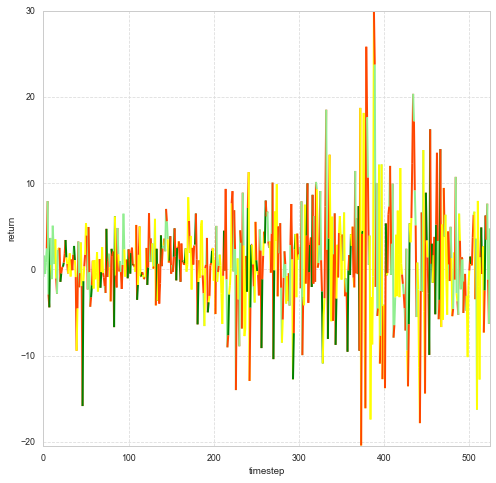

C:\Users\lucas\AppData\Local\Temp\ipykernel_38620\2813974115.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


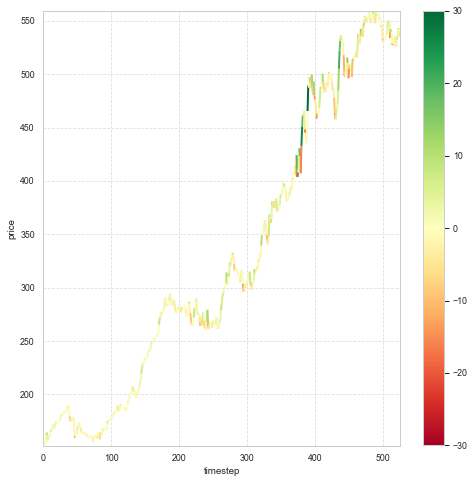

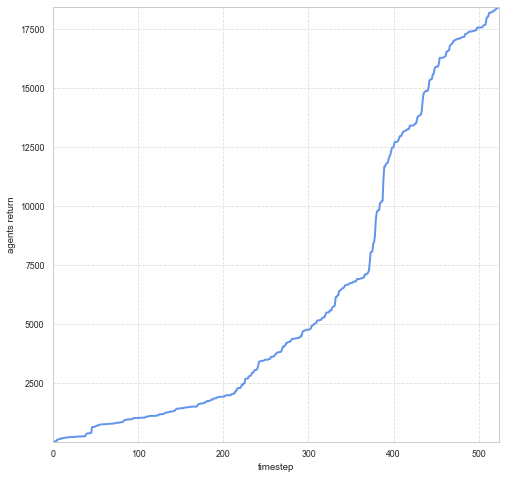

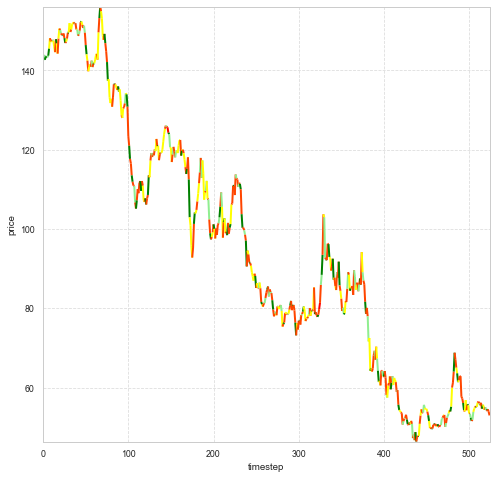

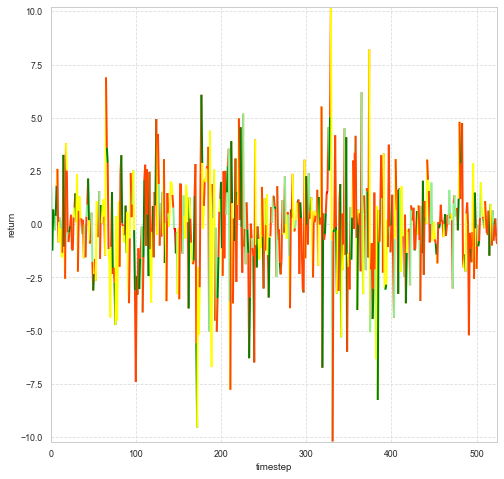

C:\Users\lucas\AppData\Local\Temp\ipykernel_38620\2813974115.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


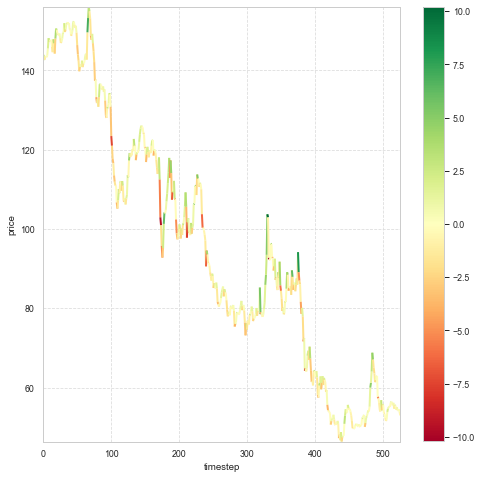

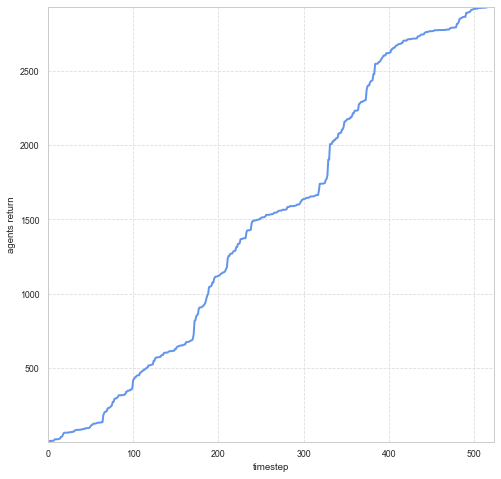

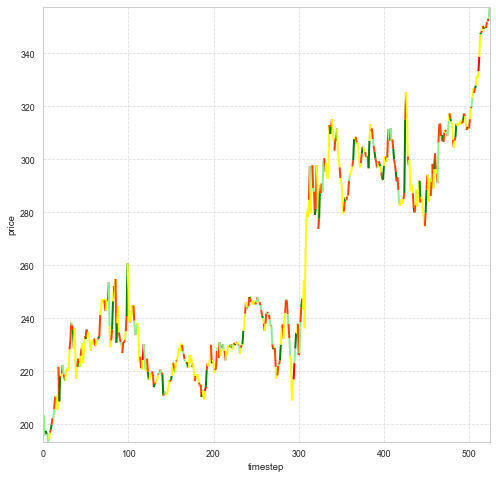

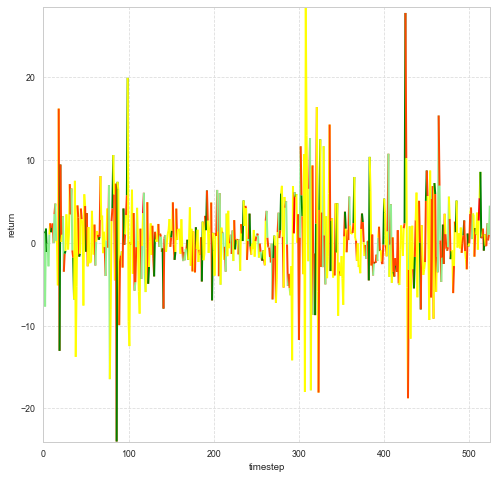

C:\Users\lucas\AppData\Local\Temp\ipykernel_38620\2813974115.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


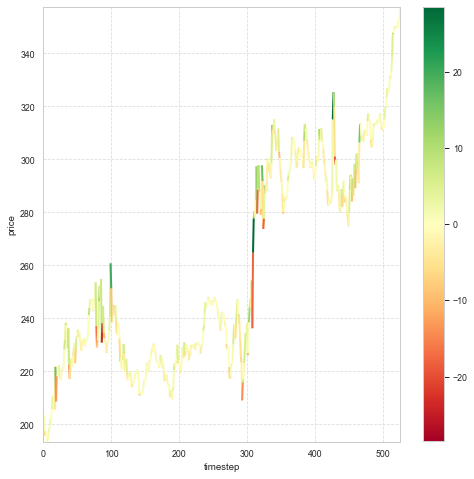

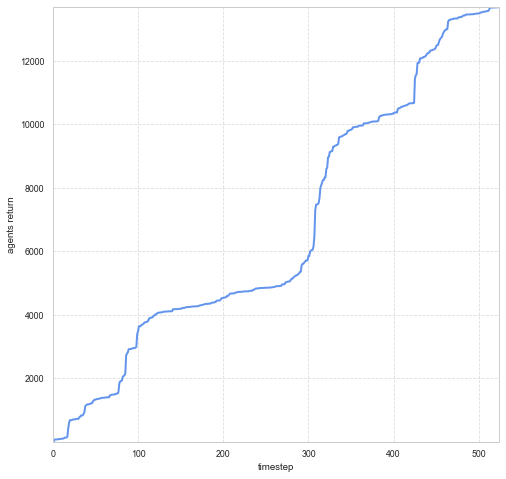

In [14]:
episode_list = [50, 100, 250, 500, 1000, 2000, 5000, 10000]
for i in range(len(episode_list)):
    position_plot(actions = action_episodes.iloc[:,i], price = prices_episodes.iloc[:,i],
         title = "", savefig = "plots/agent_episodes/" + str(episode_list[i]) + "_epi_act_price_plot.png", ylab = "price")
    position_plot(actions = action_episodes.iloc[:,i], price = return_episodes.iloc[:,i],
         title = "", savefig = "plots/agent_episodes/" + str(episode_list[i]) + "_epi_act_return_plot.png", ylab = "return")
    color_plot(color_vals = position_size_episodes.iloc[:,i], y_vals = prices_episodes.iloc[:,i],
         title = "", savefig = "plots/agent_episodes/" + str(episode_list[i]) + "_epi_pos_plot.png")
    agent_returns = np.cumsum(position_size_episodes.iloc[:,i] * return_episodes.iloc[:,i])
    fig, axs = plt.subplots(1, figsize=(8, 8))
    plt.plot(agent_returns)
    plt.xlabel("timestep")
    plt.ylabel("agents return")
    plt.savefig("plots/agent_episodes/" + str(episode_list[i]) + "_epi_agent_return.png", bbox_inches='tight')

In [100]:
env.am_params

Const       0.071636
spy[1]     -0.068058
omega       0.014471
alpha[1]    0.128824
beta[1]     0.866017
eta         6.798308
lambda     -0.128646
Name: params, dtype: float64

In [54]:
unique, counts = np.unique(agent.action_memory, return_counts=True)
result = np.column_stack((unique, counts)) 
print(result)

[[  0  26]
 [  1  20]
 [  2  22]
 [  3 932]]


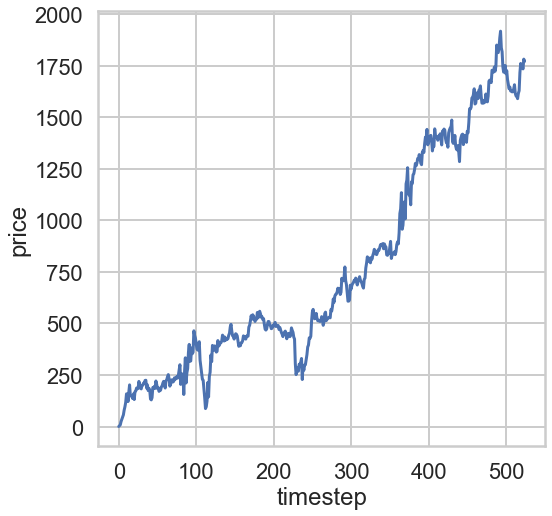

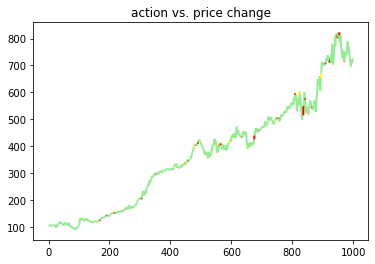

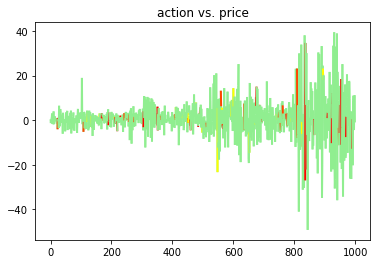

In [60]:
position_plot(actions = pd.DataFrame(agent.action_memory)- 2, price = np.array(agent.state_memory)[:,0],
             title = "action vs. price change")
position_plot(actions = pd.DataFrame(agent.action_memory)- 2, price = np.array(agent.state_memory)[:,1],
             title = "action vs. price")

In [33]:
agent.rlplot("Training Progress: Simple Harmonic Motion")

In [ ]:
sim_prices = pd.DataFrame()
for i in range(100):
    env.simulate_prices()
    sims = pd.DataFrame(env.sim_prices)
    sim_prices = pd.concat([sim_prices, sims], axis = 1)
fig, axs = plt.subplots(1, 1,figsize=(8, 8))

plt.plot(sim_prices, alpha = 1)
#plt.title("Simulated AAPL prices")

In [ ]:
plt.xlabel("t")
plt.ylabel("price")
#plt.show()
plt.savefig('plots/simulated_aapl.png', bbox_inches='tight')

In [ ]:
print(pd.DataFrame(env.am_params).to_latex())